## Importación de librerías

In [46]:
# Importación de librerías
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Para visualizar todas las columnas de los DataFrames

## Carga de datos

In [47]:
df = pd.read_csv("HR_Employee_Attrition.csv", index_col = 0)

df.head()

,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Country,Attrition,BusinessTravel,Department,JobLevel,JobRole,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction
0,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,14,0,0,1,1.0,Austria,Yes,Travel_Rarely,Sales,1,Sales Representative,2121,Yes,13,3,Very High,Medium,Medium,Medium
1,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,16,0,0,4,7.0,España,No,Non-Travel,Sales,2,Sales Executive,4736,Yes,12,2,Very High,High,High,Medium
2,College,Life Sciences,Male,Single,22,b5fed13f-7785-4daf-bb8c-1037f84e5fa7,20,0,0,4,0.0,República Checa,No,Travel_Rarely,Research & Development,1,Research Scientist,3375,No,12,2,Very High,High,High,Very High
3,College,Technical Degree,Male,Married,42,4b0a1169-b286-44fb-a453-b97ca934db57,11,1,5,22,1.0,Misisipi,No,Travel_Rarely,Research & Development,5,Manager,19232,No,11,3,High,High,Very High,Very High
4,Master,Life Sciences,Female,Single,36,6affb754-8e52-43a7-9e97-4e373ef5fccb,13,0,7,17,3.0,Portugal,No,Travel_Rarely,Sales,2,Sales Representative,4502,No,15,2,High,High,Very High,High


## Análisis exploratorio

In [48]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 1470, y el número de columnas es 25


In [49]:
df.columns

Index(['Education', 'EducationField', 'Gender', 'MaritalStatus', 'Age',
       'EmployeeId', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked',
       'Country', 'Attrition', 'BusinessTravel', 'Department', 'JobLevel',
       'JobRole', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'RelationshipSatisfaction'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 1260 non-null   object 
 1   EducationField            1470 non-null   object 
 2   Gender                    1470 non-null   object 
 3   MaritalStatus             1470 non-null   object 
 4   Age                       1470 non-null   int64  
 5   EmployeeId                1470 non-null   object 
 6   YearsInCurrentRole        1470 non-null   int64  
 7   YearsSinceLastPromotion   1470 non-null   int64  
 8   YearsWithCurrManager      1470 non-null   int64  
 9   TotalWorkingYears         1470 non-null   int64  
 10  NumCompaniesWorked        1454 non-null   float64
 11  Country                   1470 non-null   object 
 12  Attrition                 1470 non-null   object 
 13  BusinessTravel            1323 non-null   object 
 14  Department   

### Descripción de las columnas

- **`Education`**: Nivel educativo del empleado, representado por categorías como `"Bachelor"` (licenciatura), `"Master"` (maestría), `"College"` (universidad), `"Below College"` (por debajo de la universidad), etc.  

- **`EducationField`**: Área de estudio del empleado, como `"Marketing"`, `"Technical Degree"` (grado técnico), `"Medical"` (médico), `"Life Sciences"` (ciencias de la vida), etc.  

- **`Gender`**: Género del empleado, indicado como `"Male"` (hombre) o `"Female"` (mujer).  

- **`MaritalStatus`**: Estado civil del empleado, con categorías como `"Married"` (casado), `"Single"` (soltero) y `"Divorced"` (divorciado).  

- **`Age`**: Edad del empleado en años.  

- **`EmployeeId`**: Identificador único de cada empleado.  

- **`YearsInCurrentRole`**: Número de años que el empleado ha ocupado su puesto actual en la empresa.  

- **`YearsSinceLastPromotion`**: Número de años transcurridos desde la última promoción del empleado.  

- **`YearsWithCurrManager`**: Número de años que el empleado ha trabajado bajo la supervisión de su actual gerente.  

- **`TotalWorkingYears`**: Número total de años que el empleado ha trabajado en su vida profesional.  

- **`NumCompaniesWorked`**: Número de empresas en las que el empleado ha trabajado anteriormente.  

- **`Country`**: País donde reside el empleado.  

- **`Attrition`**: Indica si el empleado ha dejado la empresa (`"Yes"`) o no (`"No"`).  

- **`BusinessTravel`**: Tipo de viaje de negocios del empleado, con categorías como `"Travel_Rarely"` (viaja ocasionalmente), `"Travel_Frequently"` (viaja con frecuencia) y `"Non-Travel"` (no viaja).  

- **`Department`**: Departamento en el que trabaja el empleado, por ejemplo, `"Research & Development"` (Investigación y Desarrollo) o `"Sales"` (Ventas).  

- **`JobLevel`**: Nivel del cargo del empleado dentro de la empresa.  

- **`JobRole`**: Puesto de trabajo específico del empleado dentro de su departamento.  

- **`MonthlyIncome`**: Ingreso mensual del empleado en la empresa.  

- **`OverTime`**: Indica si el empleado trabaja horas extras (`"Yes"`) o no (`"No"`).  

- **`PercentSalaryHike`**: Porcentaje de aumento salarial recibido por el empleado.  

- **`TrainingTimesLastYear`**: Número de veces que el empleado recibió capacitación en el último año.  

- **`EnvironmentSatisfaction`**: Nivel de satisfacción del empleado con su entorno laboral, con categorías como `"Low"` (bajo), `"Medium"` (medio), `"High"` (alto) y `"Very High"` (muy alto).  

- **`JobInvolvement`**: Nivel de involucramiento del empleado en su trabajo, categorizado en `"Low"` (bajo), `"Medium"` (medio), `"High"` (alto) y `"Very High"` (muy alto).  

- **`JobSatisfaction`**: Nivel de satisfacción del empleado con su trabajo, con valores `"Low"` (bajo), `"Medium"` (medio), `"High"` (alto) y `"Very High"` (muy alto).  

- **`RelationshipSatisfaction`**: Nivel de satisfacción del empleado con las relaciones interpersonales en el trabajo, categorizado como `"Low"` (bajo), `"Medium"` (medio), `"High"` (alto) y `"Very High"` (muy alto).  


In [51]:
df['EmployeeId'].duplicated().sum()

np.int64(0)

Vemos que la columna `EmployeeId` no contiene duplicados por lo que podemos eliminarla, ya que no nos aporta ningún valor.

In [52]:
df.drop(columns=['EmployeeId'], inplace=True)

## Identificación de duplicados

Comprobemos ahora si existen duplicados a lo largo de todo el dataframe

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.drop_duplicates(inplace=True)

## Identificación de nulos

In [55]:
df.isna().sum()

Education                   210
EducationField                0
Gender                        0
MaritalStatus                 0
Age                           0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
TotalWorkingYears             0
NumCompaniesWorked           16
Country                       0
Attrition                     0
BusinessTravel              147
Department                    0
JobLevel                      0
JobRole                       0
MonthlyIncome                 0
OverTime                      0
PercentSalaryHike             0
TrainingTimesLastYear         0
EnvironmentSatisfaction       0
JobInvolvement                0
JobSatisfaction             191
RelationshipSatisfaction     31
dtype: int64

### Identificar variables numéricas y categóricas

In [56]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['Age', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike',
       'TrainingTimesLastYear'],
      dtype='object')

Variables categóricas:

 Index(['Education', 'EducationField', 'Gender', 'MaritalStatus', 'Country',
       'Attrition', 'BusinessTravel', 'Department', 'JobRole', 'OverTime',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'RelationshipSatisfaction'],
      dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [57]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.0,60.0
YearsInCurrentRole,1470.0,6.24,5.37,0.0,2.0,5.0,9.0,23.0
YearsSinceLastPromotion,1470.0,1.04,1.94,0.0,0.0,0.0,1.0,13.0
YearsWithCurrManager,1470.0,2.08,2.62,0.0,0.0,1.0,3.0,17.0
TotalWorkingYears,1470.0,11.28,7.78,0.0,6.0,10.0,15.0,40.0
NumCompaniesWorked,1454.0,2.68,2.49,0.0,1.0,2.0,4.0,9.0
JobLevel,1470.0,2.06,1.11,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.0,19999.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.0,14.0,18.0,25.0
TrainingTimesLastYear,1470.0,2.80,1.29,0.0,2.0,3.0,3.0,6.0


### Visualizaciones

Graficar histogramas para variables numéricas

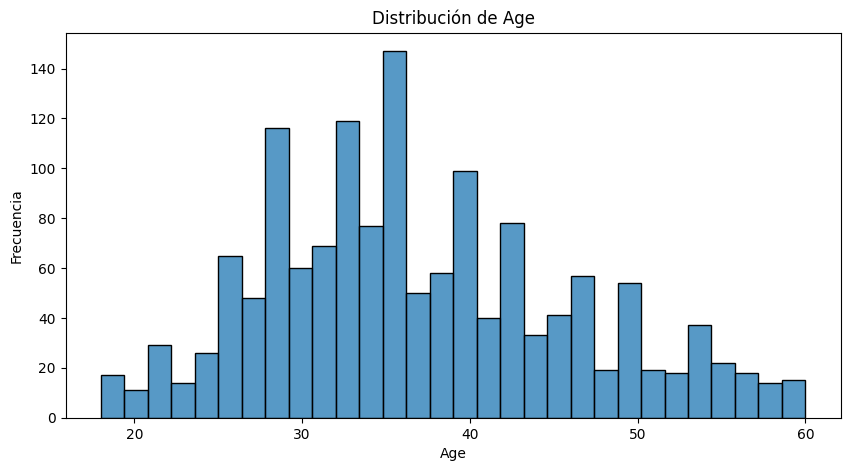

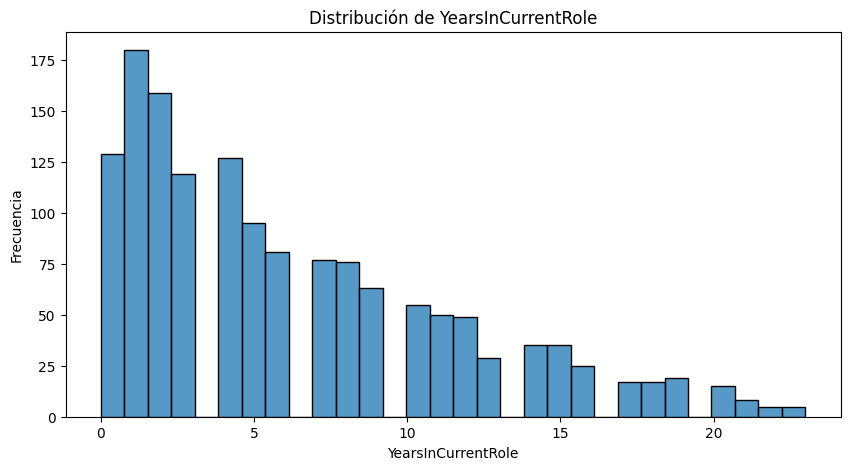

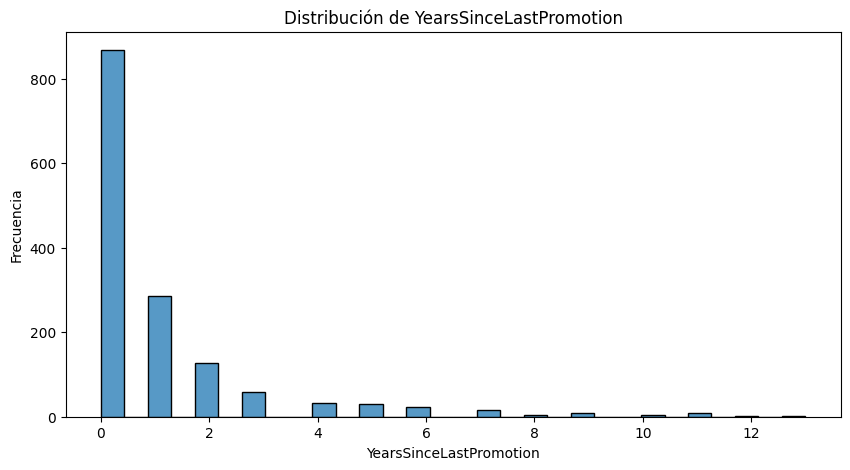

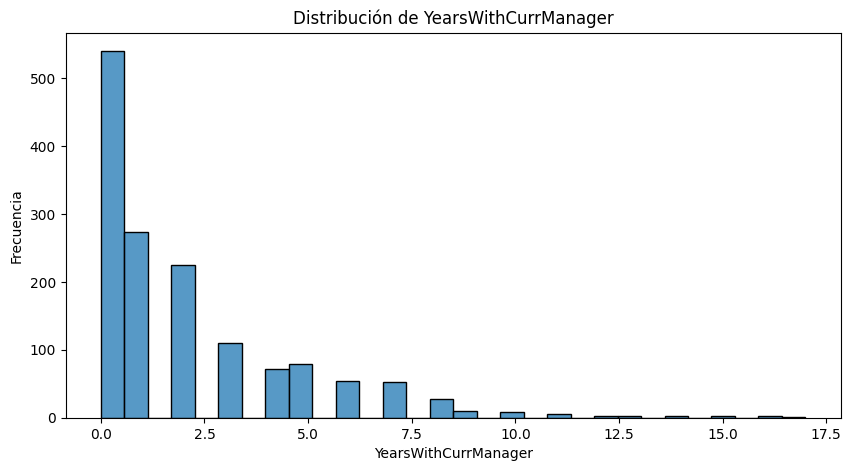

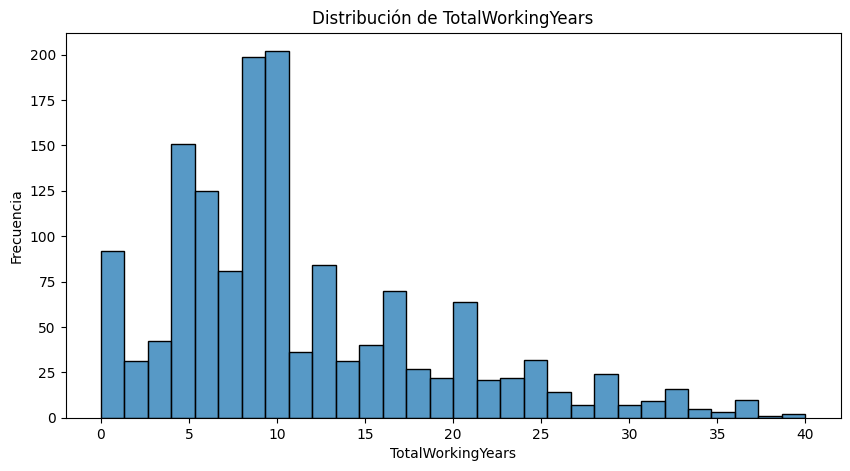

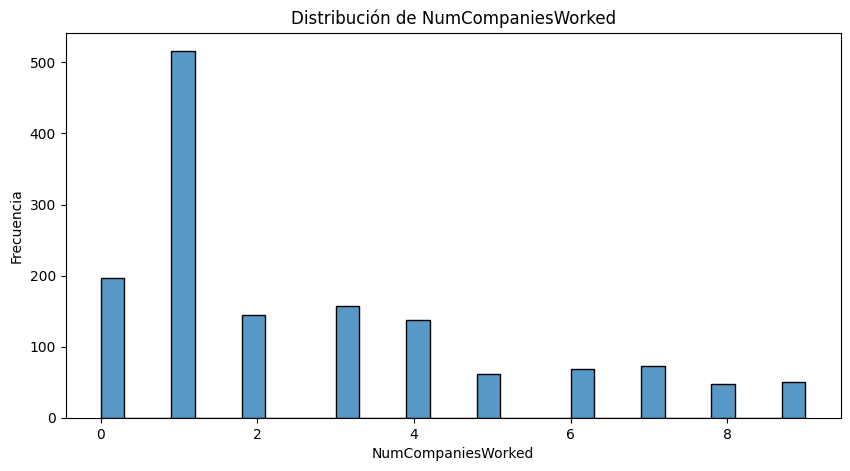

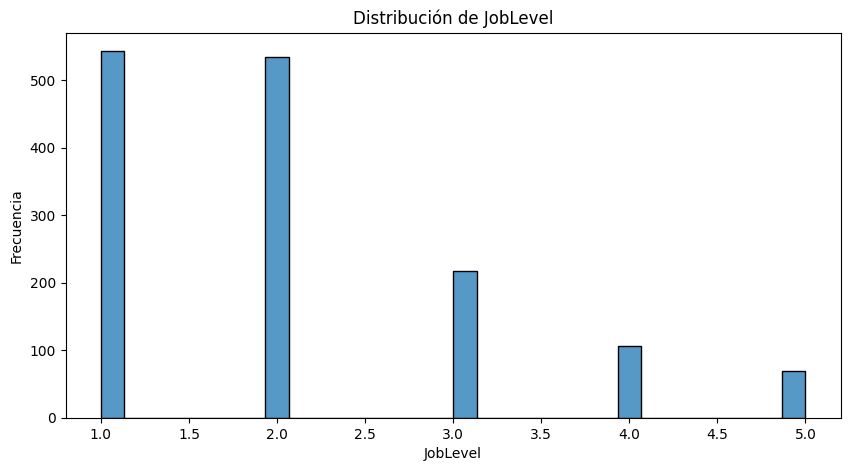

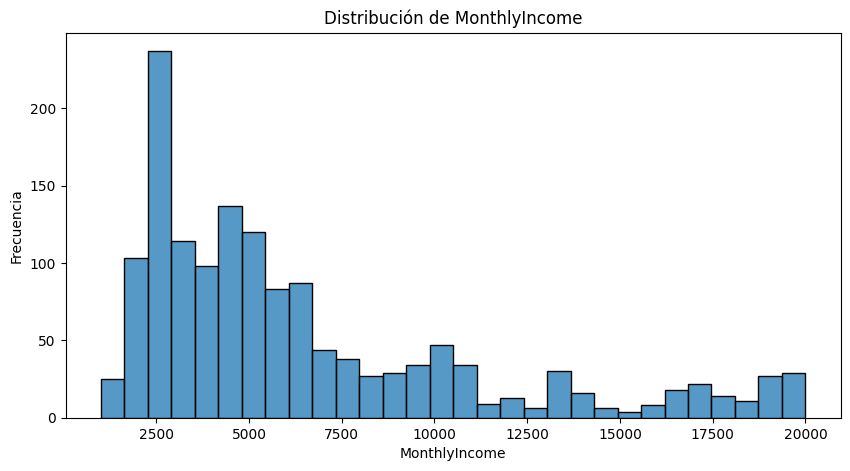

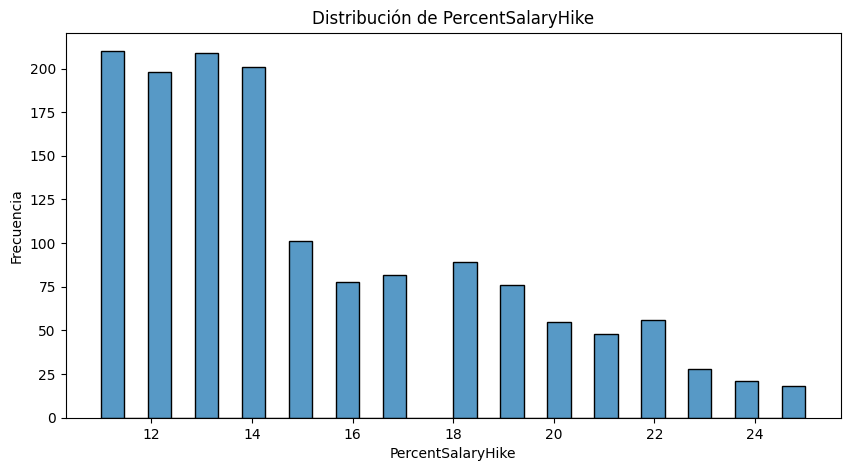

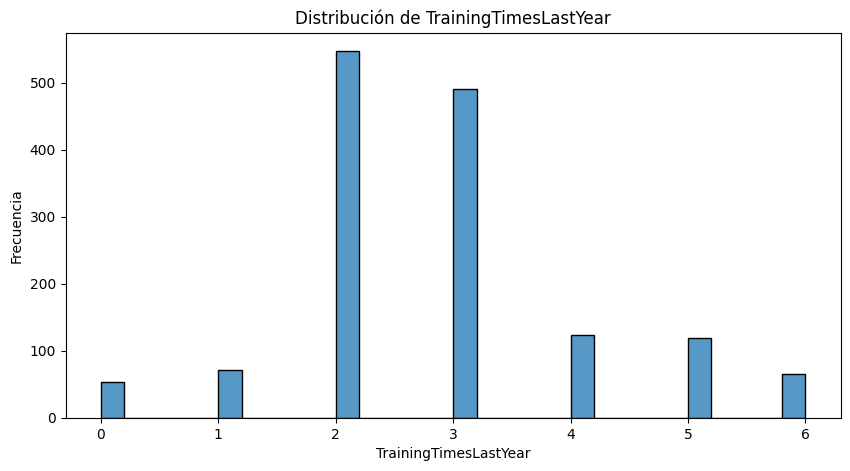

In [58]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

## Variables categóricas

### Estadísticas descriptivas

In [59]:
df.describe(include = "object").T

,count,unique,top,freq
Education,1260,5,Bachelor,479
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
MaritalStatus,1470,3,Married,673
Country,1470,70,Noruega,46
Attrition,1470,2,No,1233
BusinessTravel,1323,3,Travel_Rarely,941
Department,1470,3,Research & Development,961
JobRole,1470,9,Sales Executive,326
OverTime,1470,2,No,1054


### Valores únicos y frecuencias

In [60]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Education' -----------

Valores únicos: ['Bachelor' 'College' 'Master' 'Below College' nan 'Doctor']

Frecuencias de los valores únicos de las categorías:


Education
Bachelor         479
Master           353
College          243
Below College    142
Doctor            43
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'EducationField' -----------

Valores únicos: ['Other' 'Technical Degree' 'Life Sciences' 'Medical' 'Marketing'
 'Human Resources']

Frecuencias de los valores únicos de las categorías:


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Gender' -----------

Valores únicos: ['Male' 'Female']

Frecuencias de los valores únicos de las categorías:


Gender
Male      882
Female    588
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'MaritalStatus' -----------

Valores únicos: ['Single' 'Married' 'Divorced']

Frecuencias de los valores únicos de las categorías:


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Country' -----------

Valores únicos: ['Austria' 'España' 'República Checa' 'Misisipi' 'Portugal' 'Noruega'
 'Italia' 'Bélgica' 'Croacia' 'Grecia' 'Wyoming' 'Delaware' 'Texas' 'Iowa'
 'Finlandia' 'Utah' 'Dinamarca' 'Indiana' 'Maine' 'California' 'Alaska'
 'Suecia' 'Illinois' 'Montana' 'Maryland' 'New Hampshire' 'Ohio'
 'Dakota del Norte' 'Rumania' 'Colorado' 'Vermont' 'Kentucky' 'Kansas'
 'Pensilvania' 'Suiza' 'Minnesota' 'Nueva Jersey' 'Francia' 'Reino Unido'
 'Carolina del Norte' 'Polonia' 'Massachusetts' 'Arizona' 'Nebraska'
 'Florida' 'Países Bajos' 'Alemania' 'Georgia' 'Misuri' 'Washington'
 'Tennessee' 'Oklahoma' 'Nevada' 'Connecticut' 'Arkansas' 'Hungría'
 'Dakota del Sur' 'Luisiana' 'Wisconsin' 'Michigan' 'Rhode Island'
 'Carolina del Sur' 'Nuevo México' 'Virginia' 'Nueva York' 'Idaho'
 'Alabama' 'Oregón' 'Virginia Occidental' 'Hawaii']

Frecuencias de los valores únicos de las categorías:


Country
Noruega         46
Francia         45
Dinamarca       41
Países Bajos    41
Polonia         40
                ..
Alaska           9
Nueva York       9
Idaho            9
Kentucky         9
Oklahoma         8
Name: count, Length: 70, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Attrition' -----------

Valores únicos: ['Yes' 'No']

Frecuencias de los valores únicos de las categorías:


Attrition
No     1233
Yes     237
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'BusinessTravel' -----------

Valores únicos: ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently' nan]

Frecuencias de los valores únicos de las categorías:


BusinessTravel
Travel_Rarely        941
Travel_Frequently    250
Non-Travel           132
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Department' -----------

Valores únicos: ['Sales' 'Research & Development' 'Human Resources']

Frecuencias de los valores únicos de las categorías:


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'JobRole' -----------

Valores únicos: ['Sales Representative' 'Sales Executive' 'Research Scientist' 'Manager'
 'Laboratory Technician' 'Healthcare Representative' 'Research Director'
 'Manufacturing Director' 'Human Resources']

Frecuencias de los valores únicos de las categorías:


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'OverTime' -----------

Valores únicos: ['Yes' 'No']

Frecuencias de los valores únicos de las categorías:


OverTime
No     1054
Yes     416
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'EnvironmentSatisfaction' -----------

Valores únicos: ['Very High' 'High' 'Low' 'Medium']

Frecuencias de los valores únicos de las categorías:


EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'JobInvolvement' -----------

Valores únicos: ['Medium' 'High' 'Very High' 'Low']

Frecuencias de los valores únicos de las categorías:


JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'JobSatisfaction' -----------

Valores únicos: ['Medium' 'High' 'Very High' 'Low' nan]

Frecuencias de los valores únicos de las categorías:


JobSatisfaction
Very High    400
High         381
Low          257
Medium       241
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'RelationshipSatisfaction' -----------

Valores únicos: ['Medium' 'Very High' 'High' 'Low' nan]

Frecuencias de los valores únicos de las categorías:


RelationshipSatisfaction
High         450
Very High    423
Medium       297
Low          269
Name: count, dtype: int64

### Visualizaciones

Graficar gráficos de barras para variables categóricas

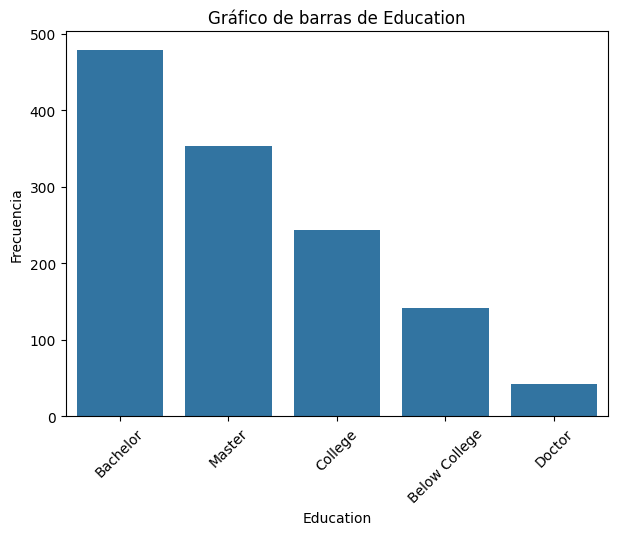

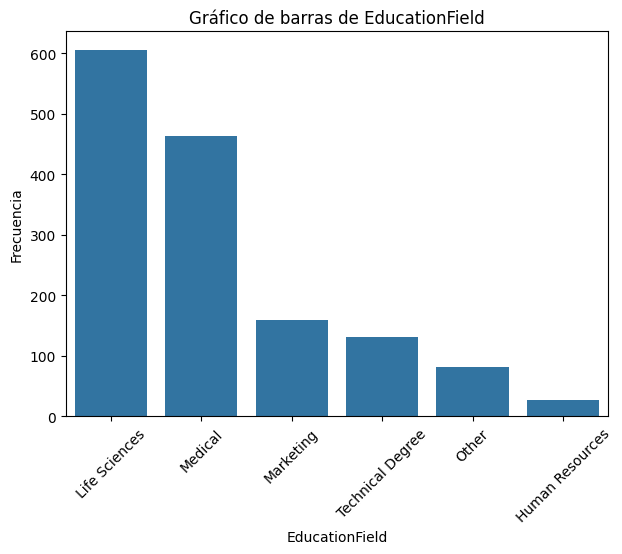

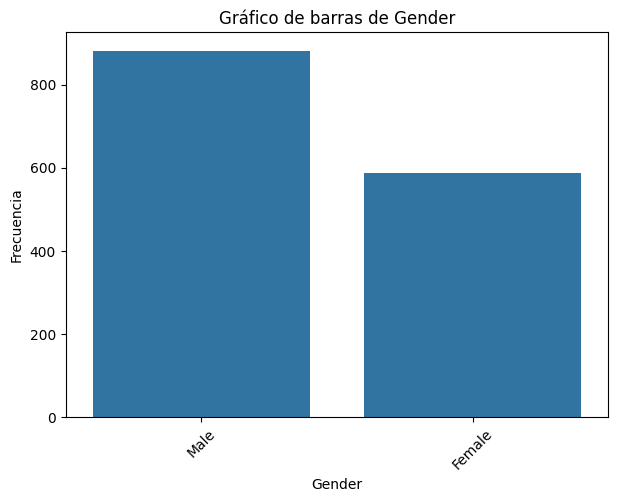

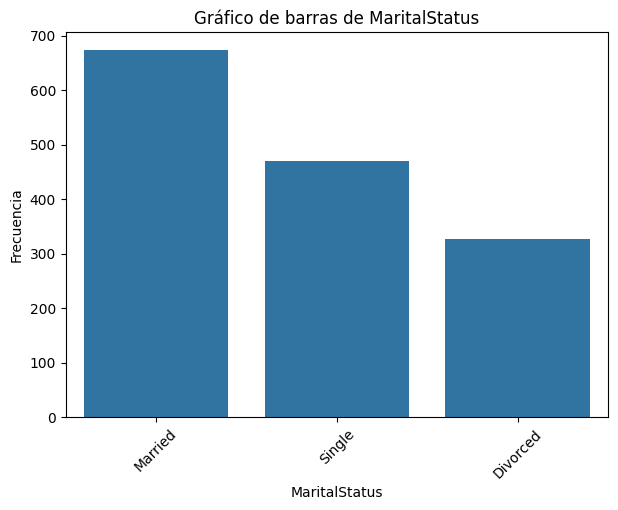

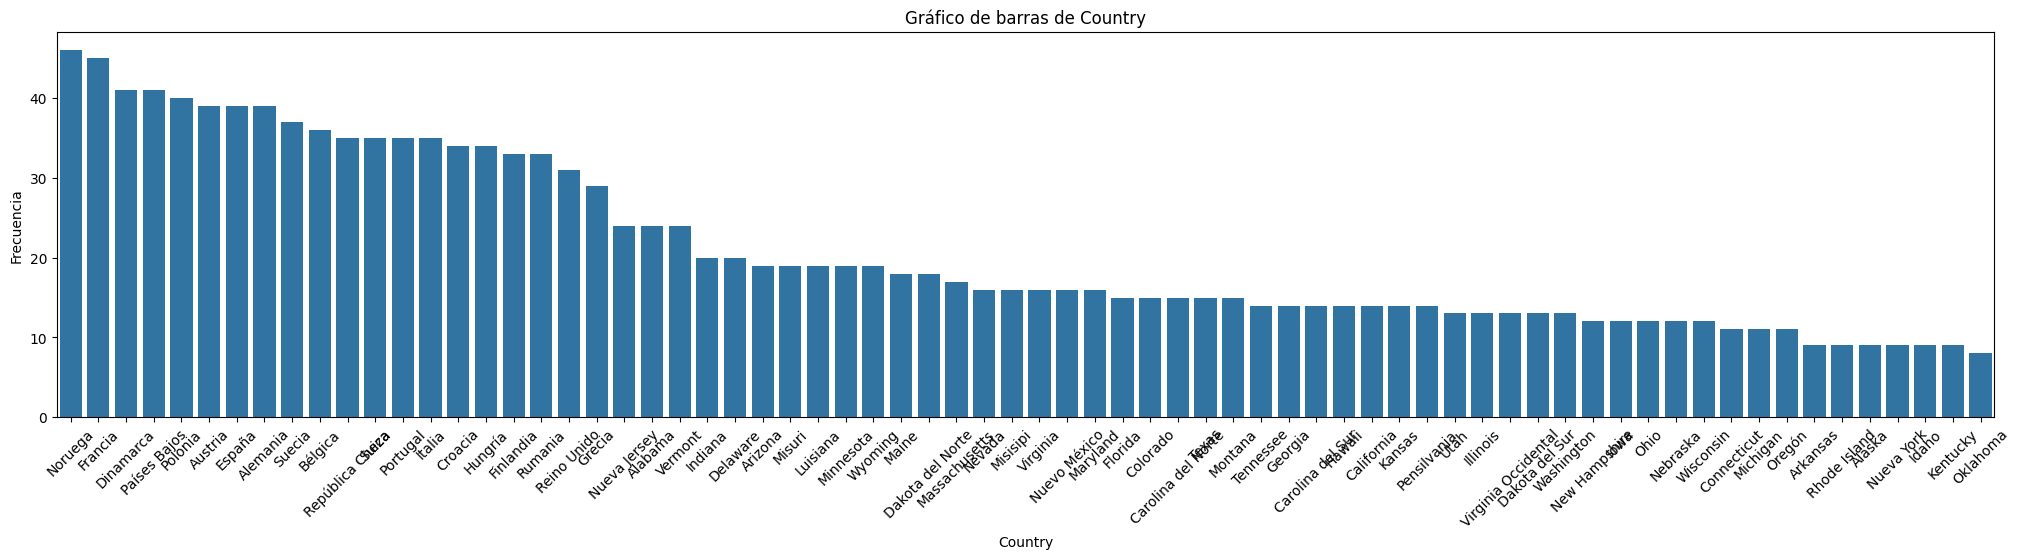

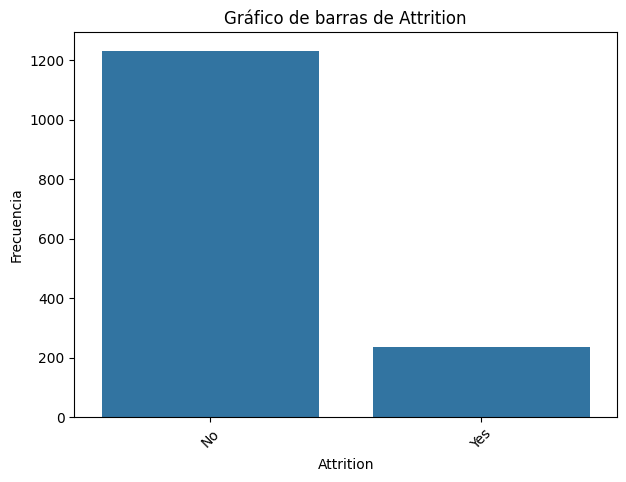

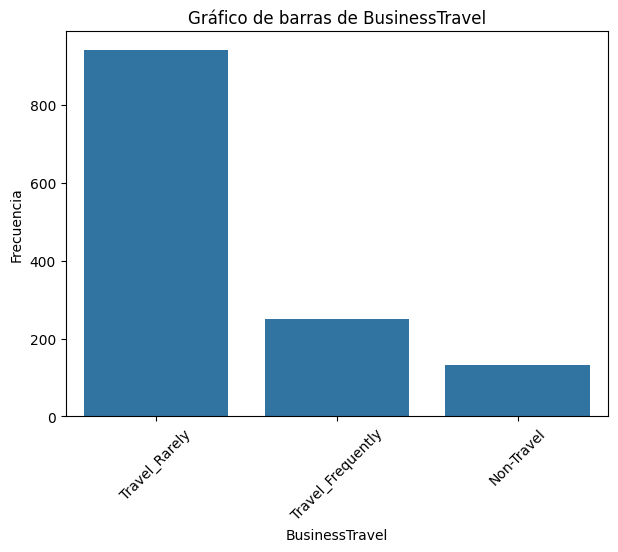

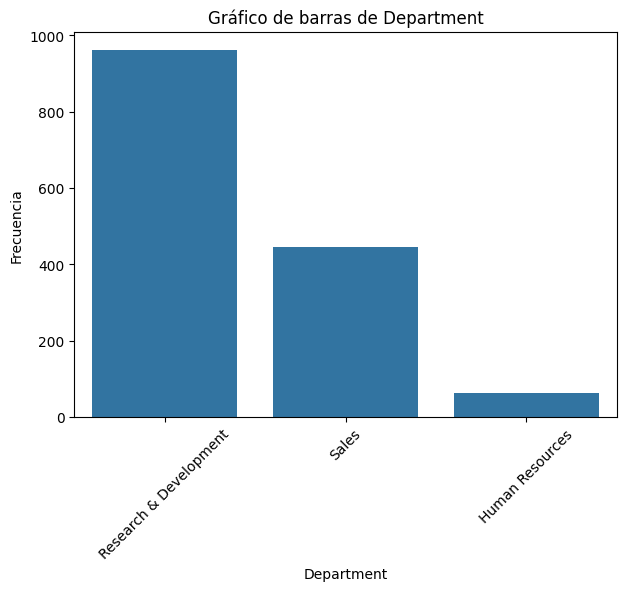

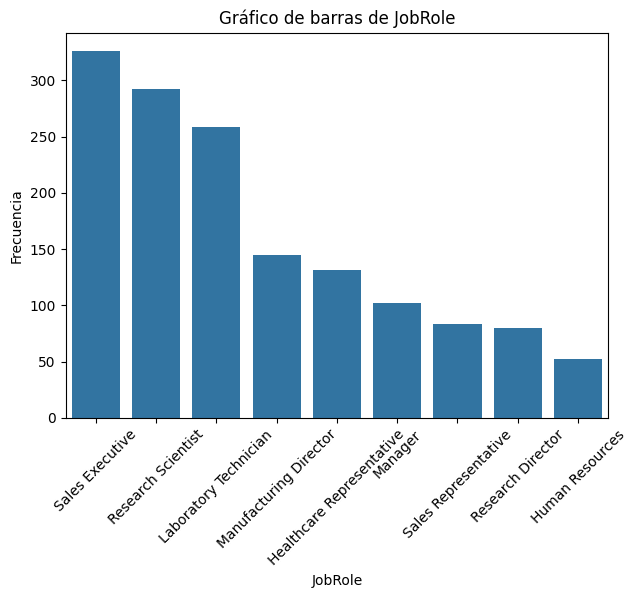

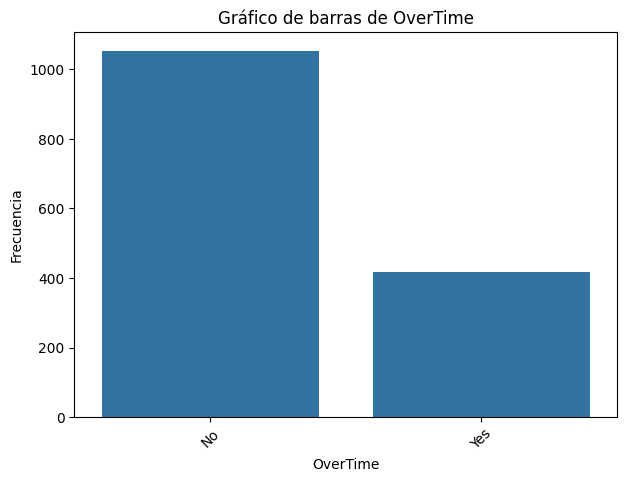

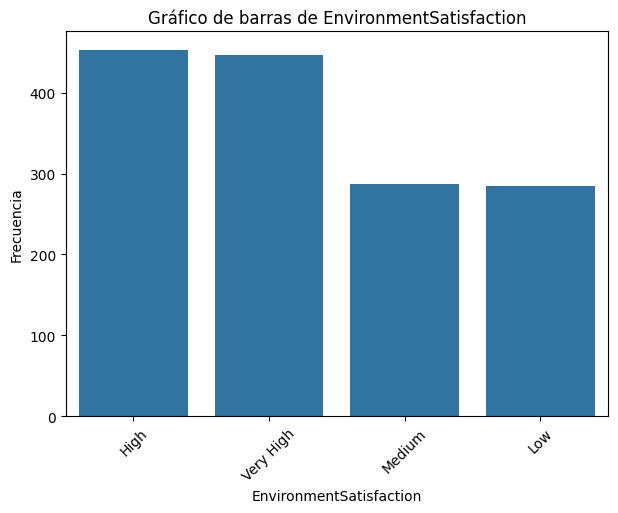

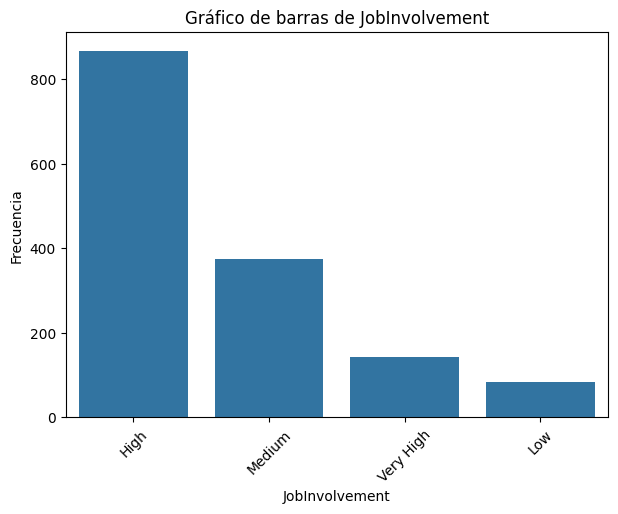

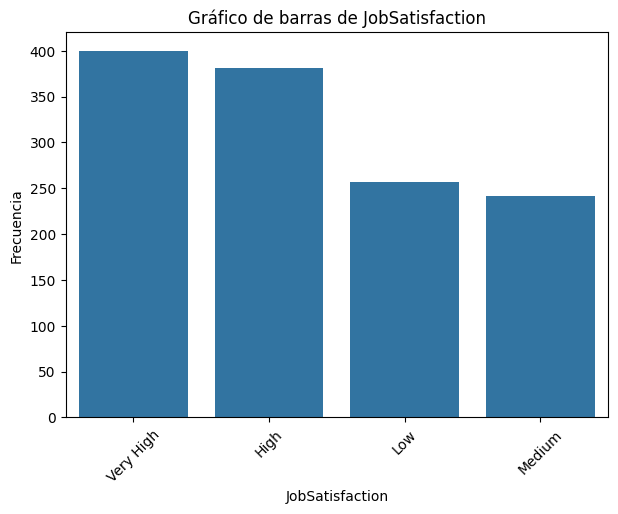

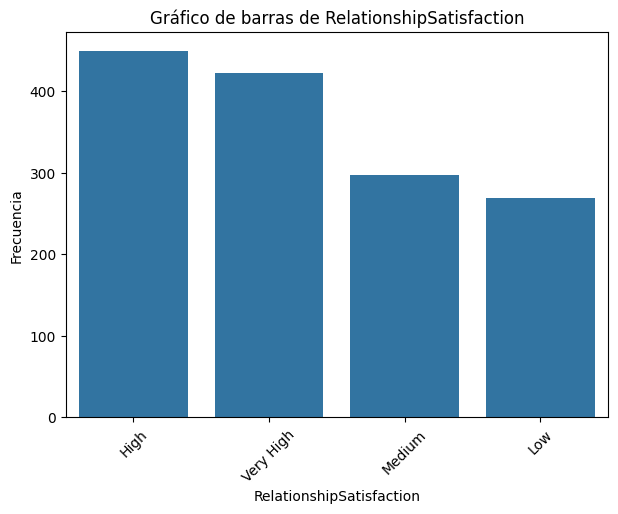

In [61]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5  # Altura fija

    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()


---

---

## Matriz de correlación

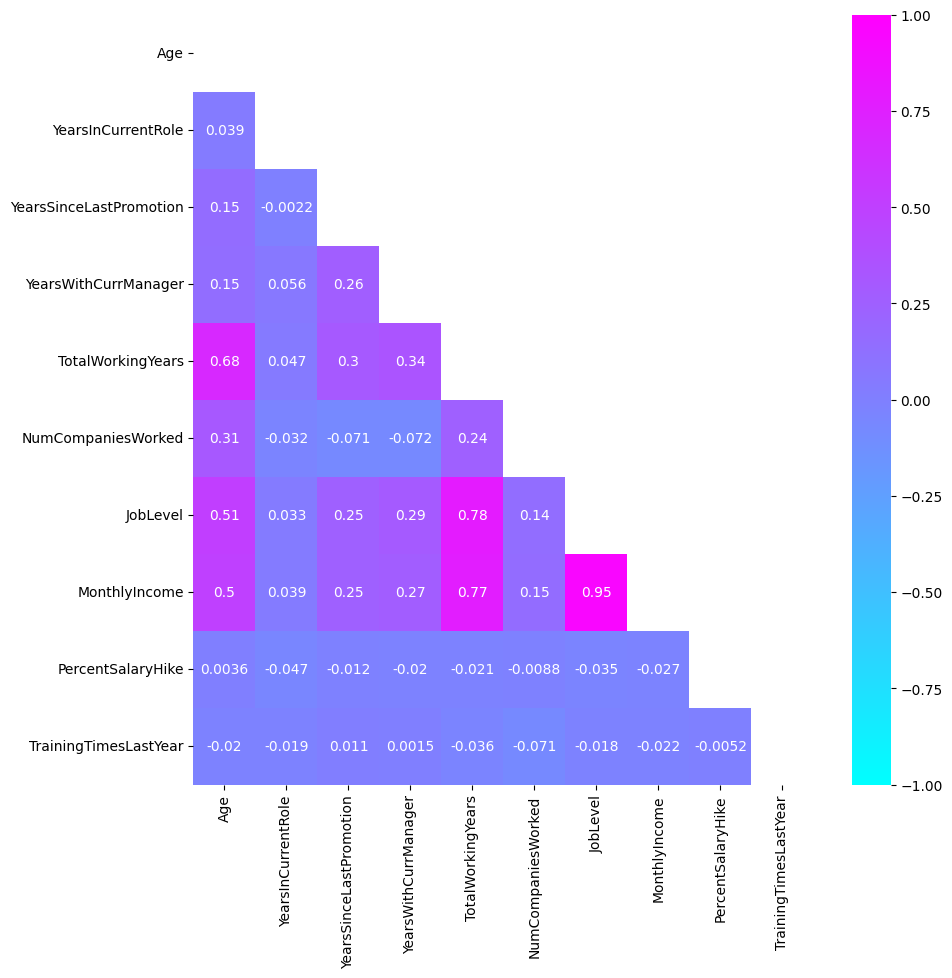

In [62]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(10, 10))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix, 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            mask=mask,
            cmap='cool')

plt.show()

## Relaciones cruzadas

### Variable objetivo numérica `MonthlyIncome`

Generamos gráficos de dispersión

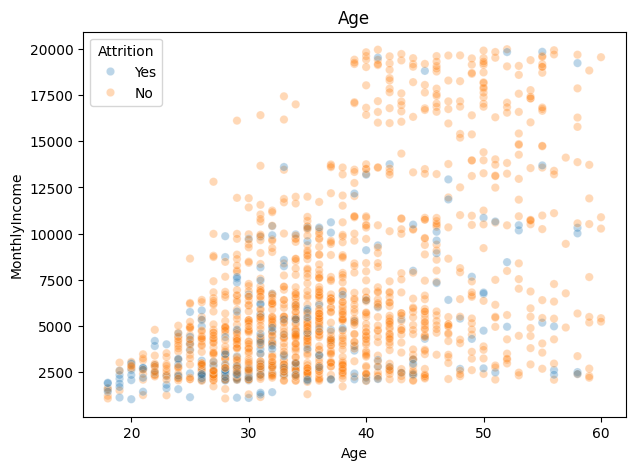

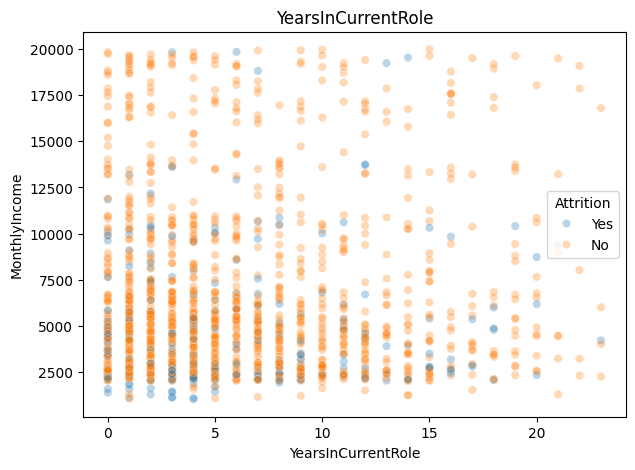

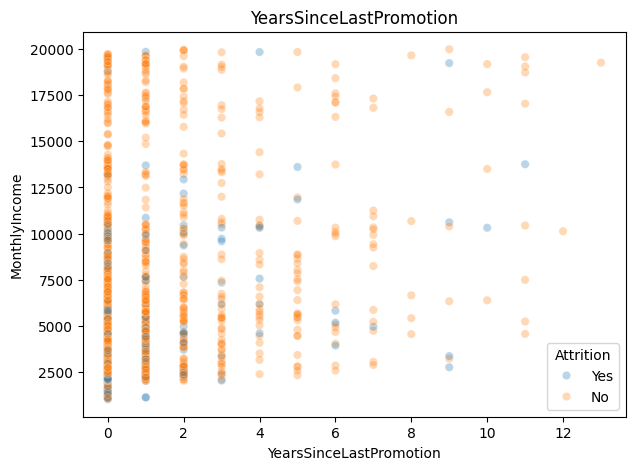

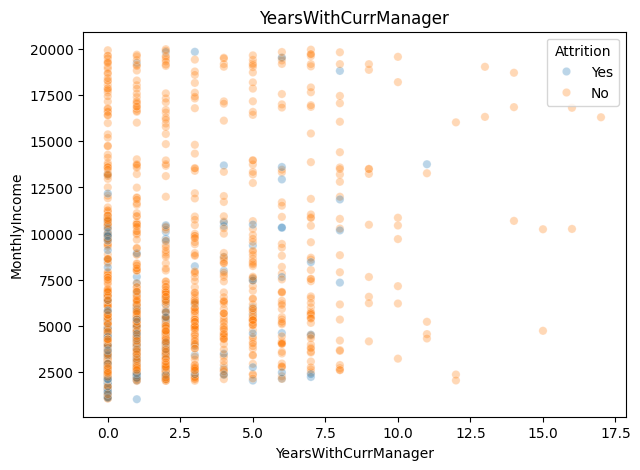

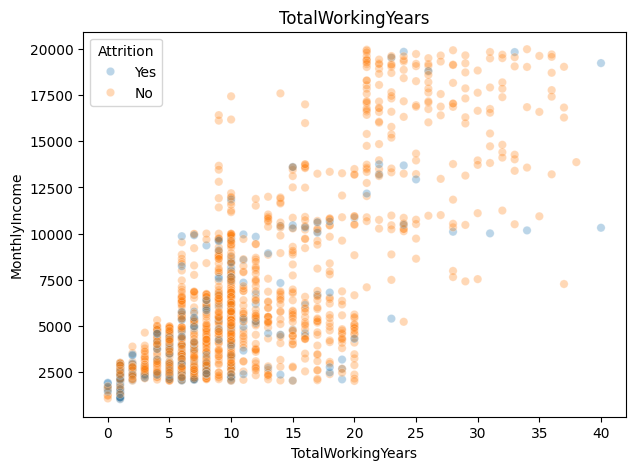

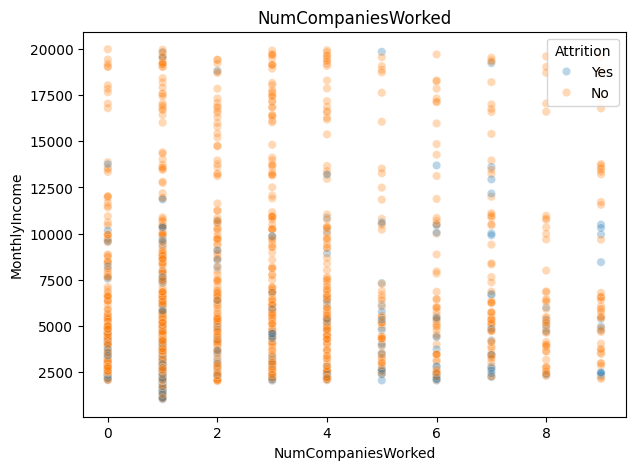

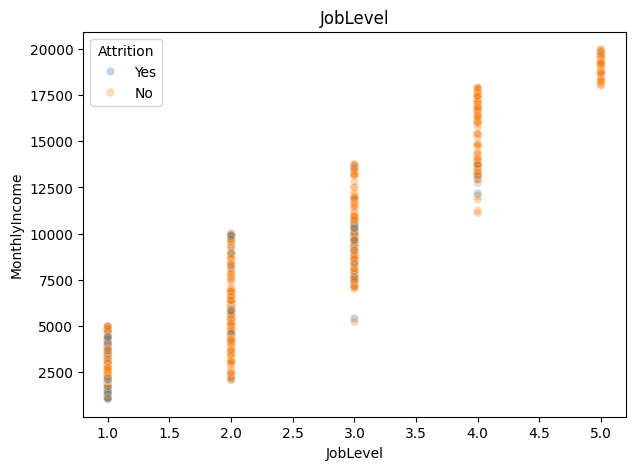

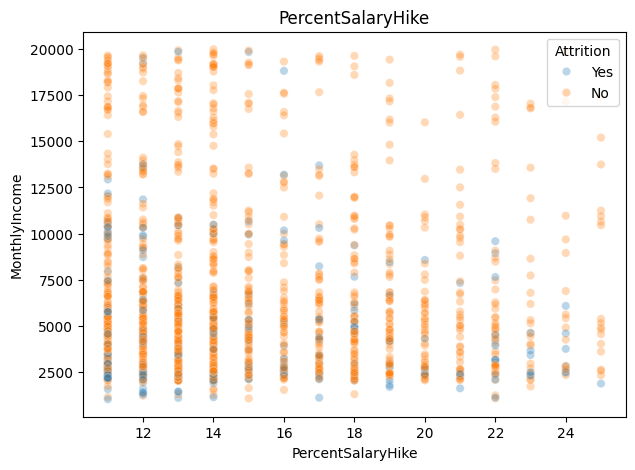

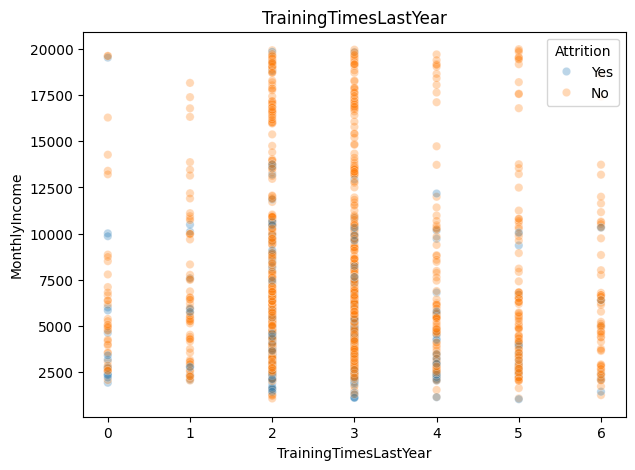

In [63]:
# Definir la variable objetivo
tv = 'MonthlyIncome'

# Definir DataFrame y variables numéricas
df_num = df.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore')
cols_num = df_num.columns

# Generar gráficos de dispersión
for col in cols_num:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=df[col], y=df[tv], hue=df['Attrition'], alpha=0.3)
    # sns.scatterplot(x=df[col], y=df[tv])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()


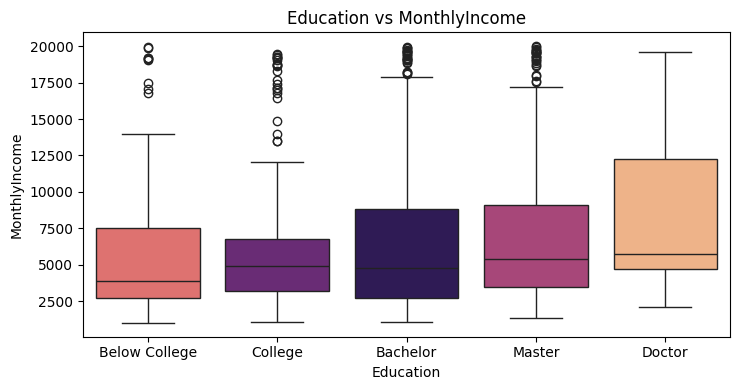

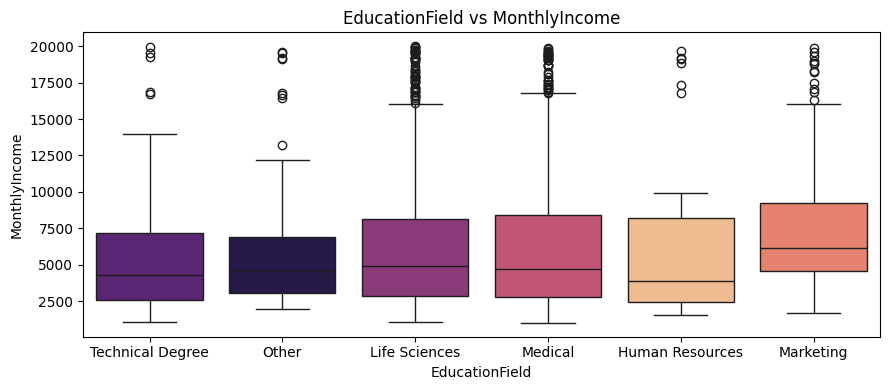

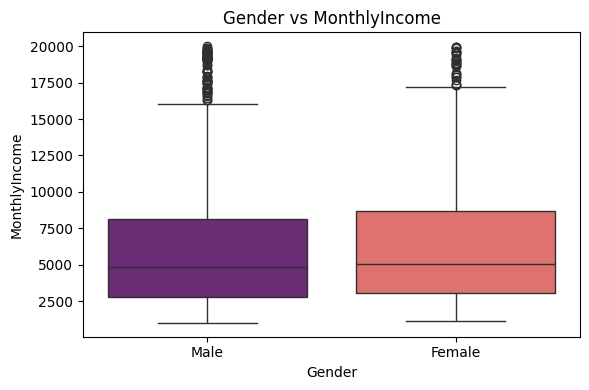

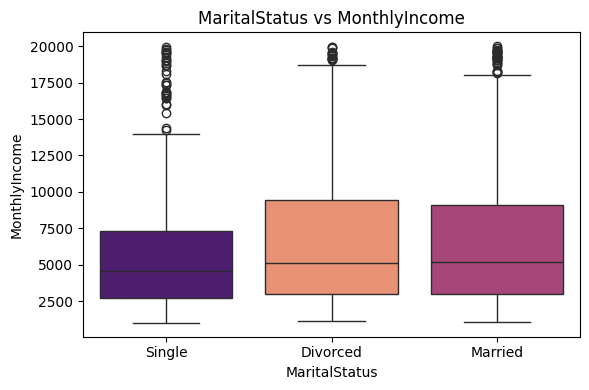

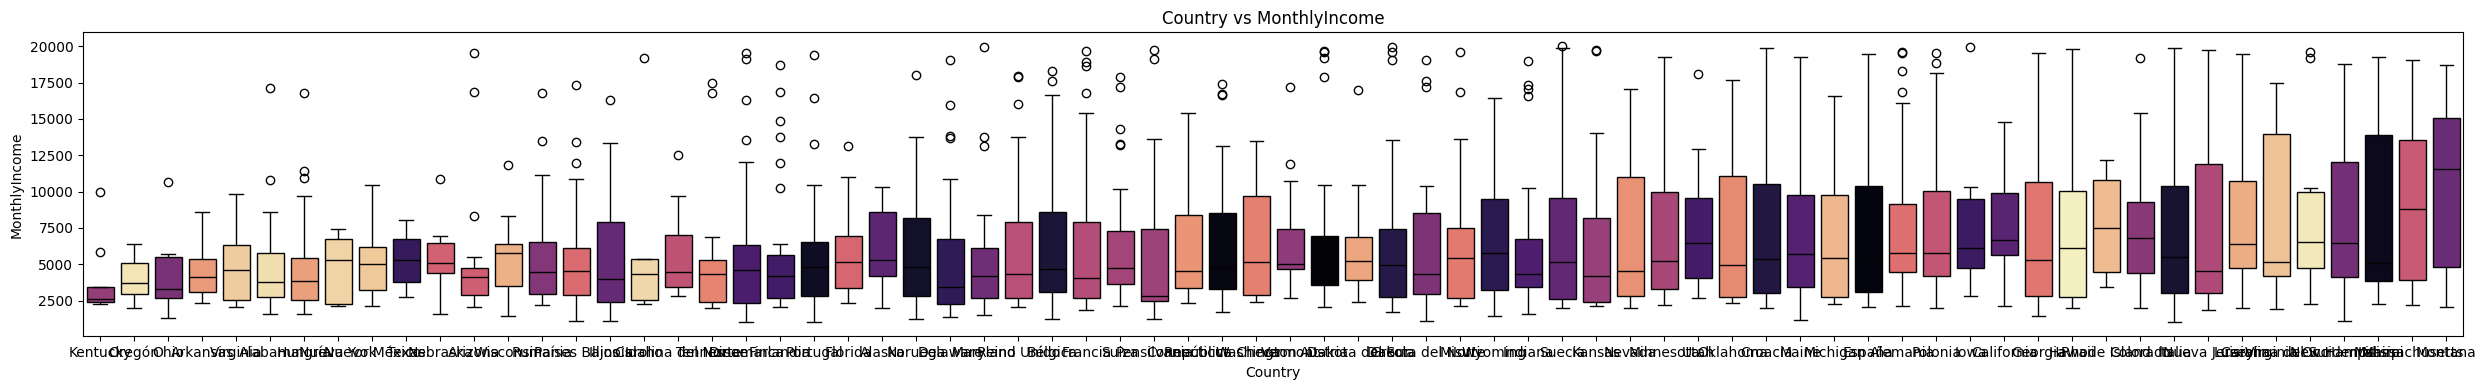

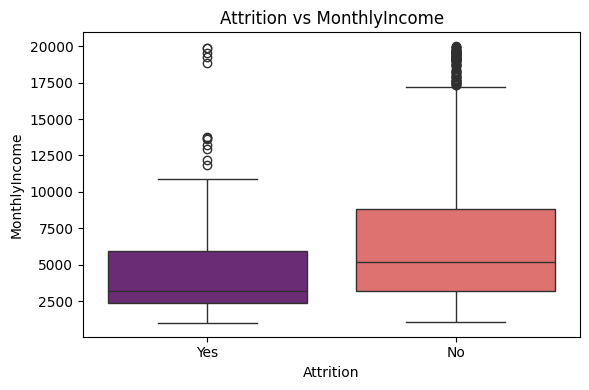

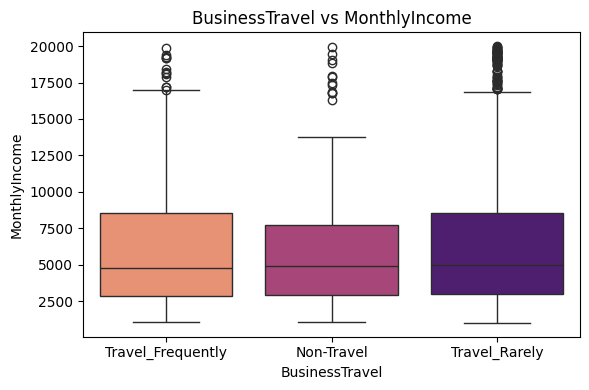

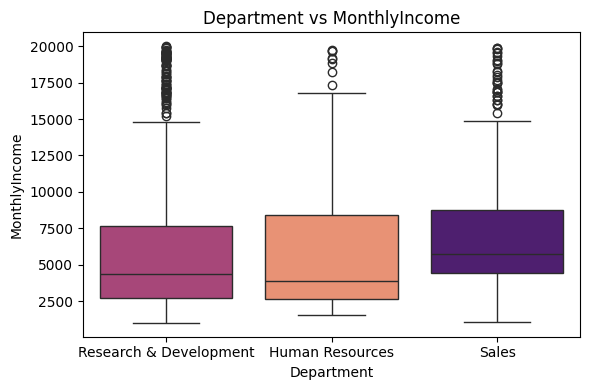

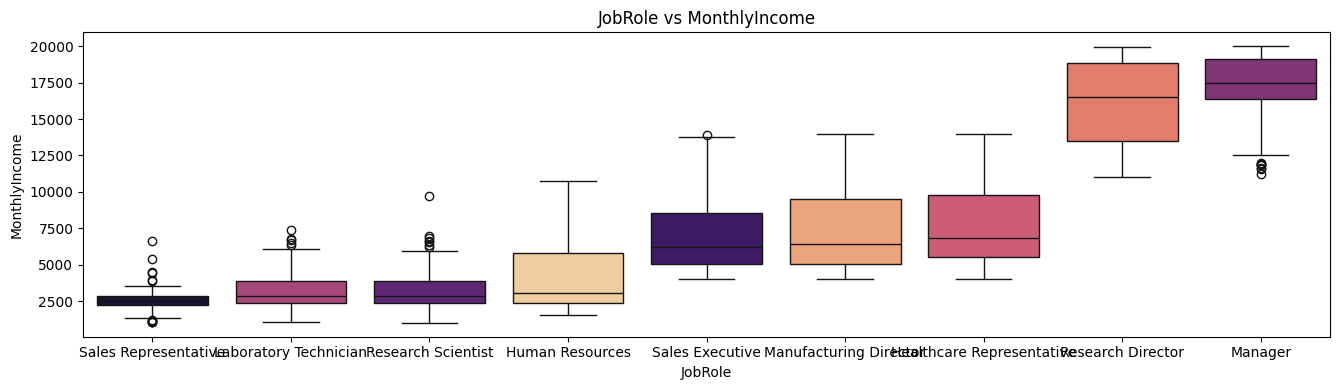

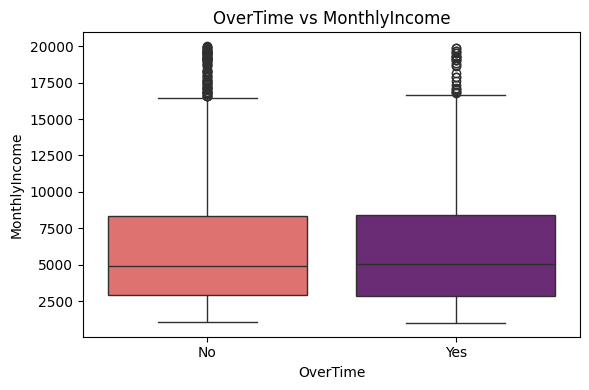

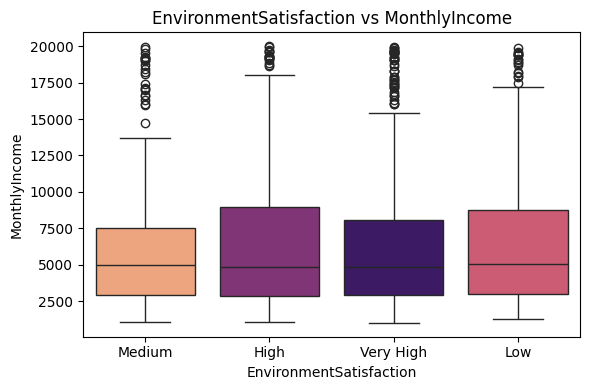

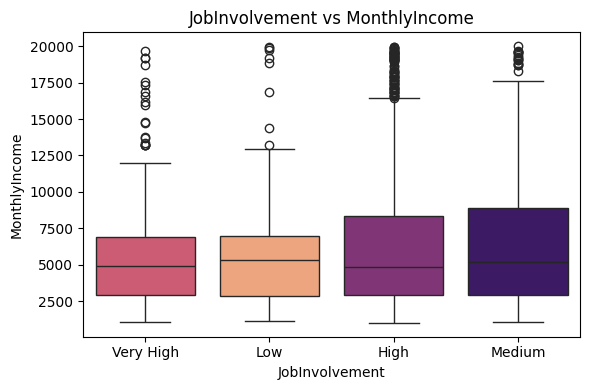

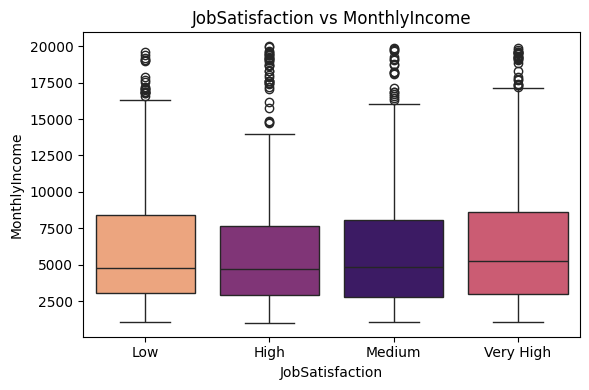

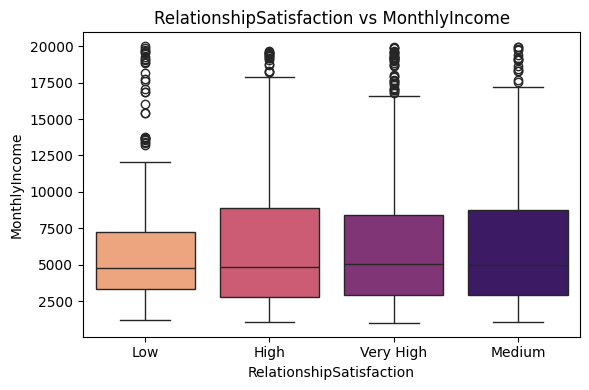

In [64]:
# Definir la variable objetivo
tv = 'MonthlyIncome'

# Generar gráficos independientes para cada variable categórica
for col in cat_cols:
    # Calcular el número de categorías únicas
    num_cats = df[col].nunique()

    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1.5), 25)  # Ancho mínimo de 6, máximo de 25
    fig_height = 4

    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=df[col], y=df[tv], hue=df[col], data=df, order=ordered_cats, palette="magma", legend=False)
    
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.show()


---

### Variable objetivo categórica `Attrition`

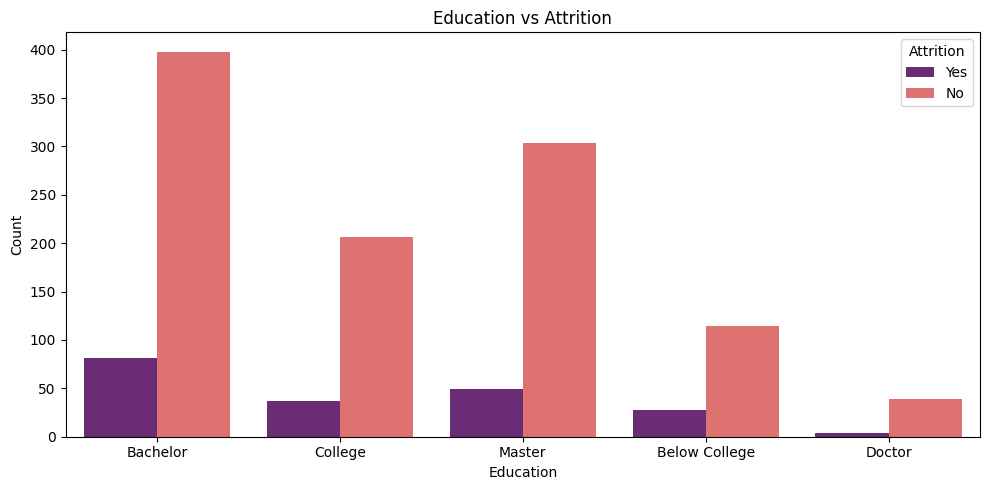

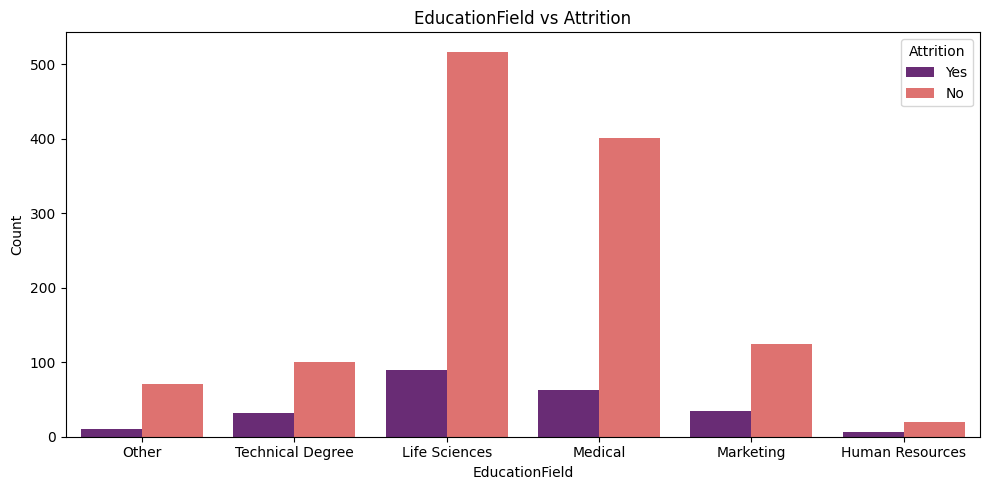

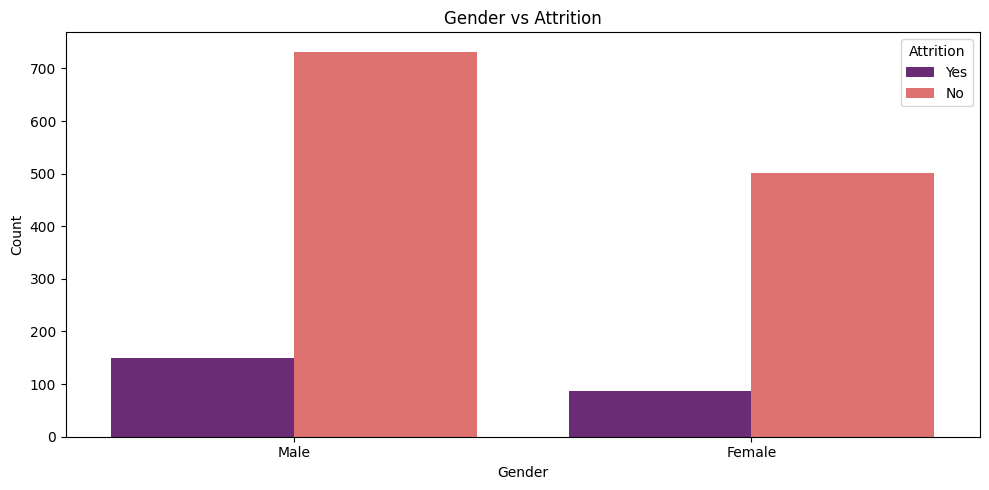

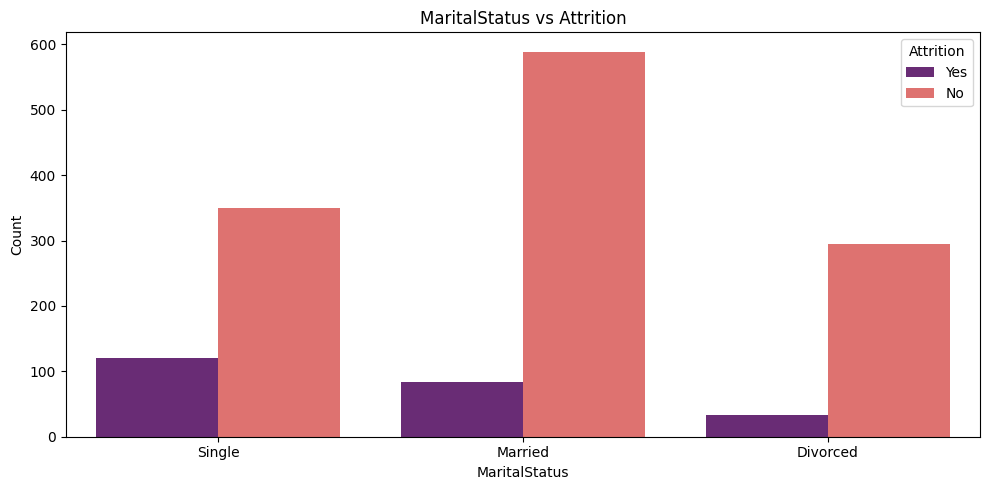

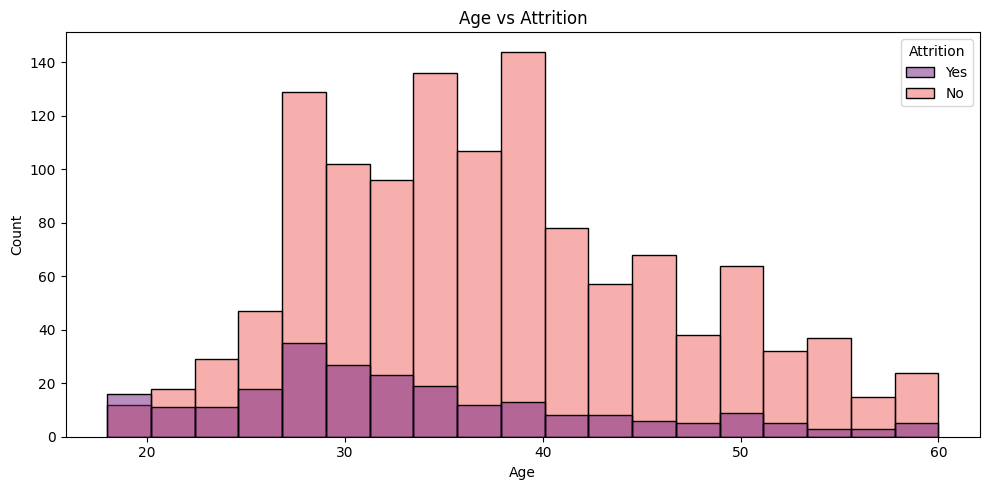

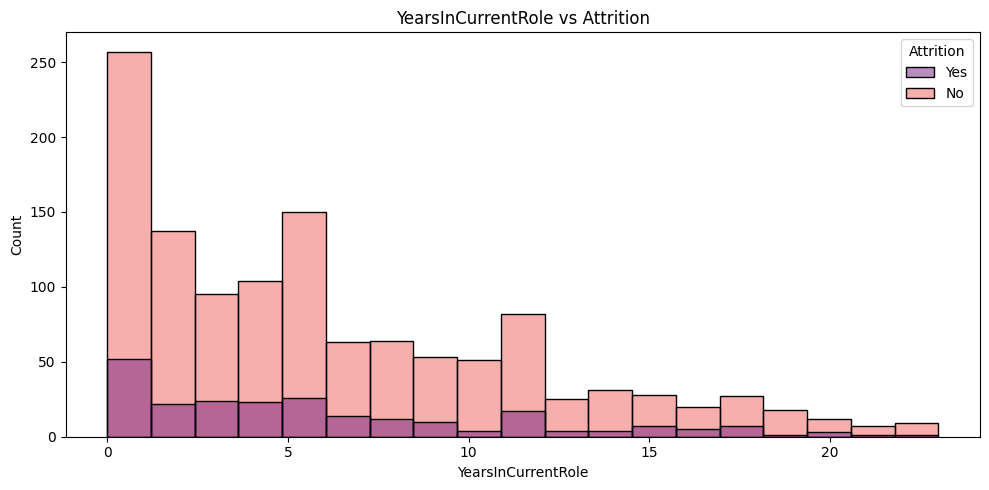

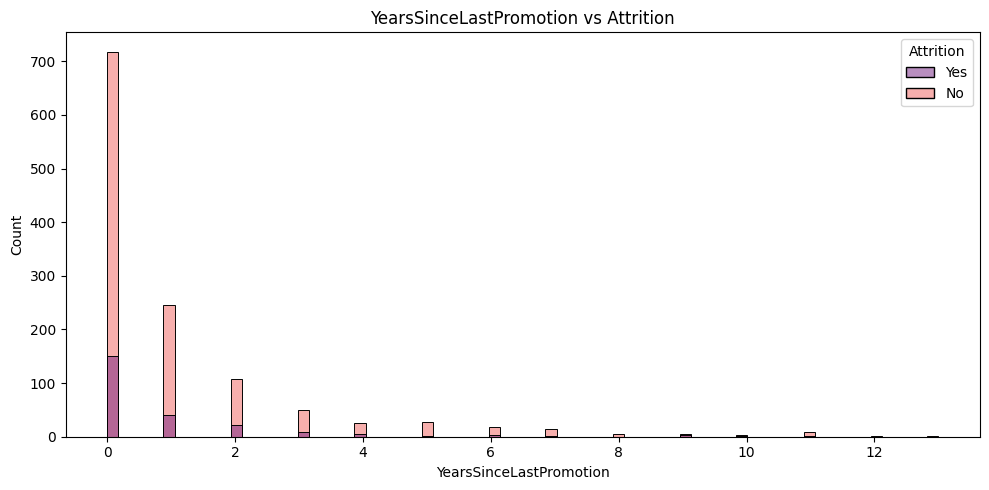

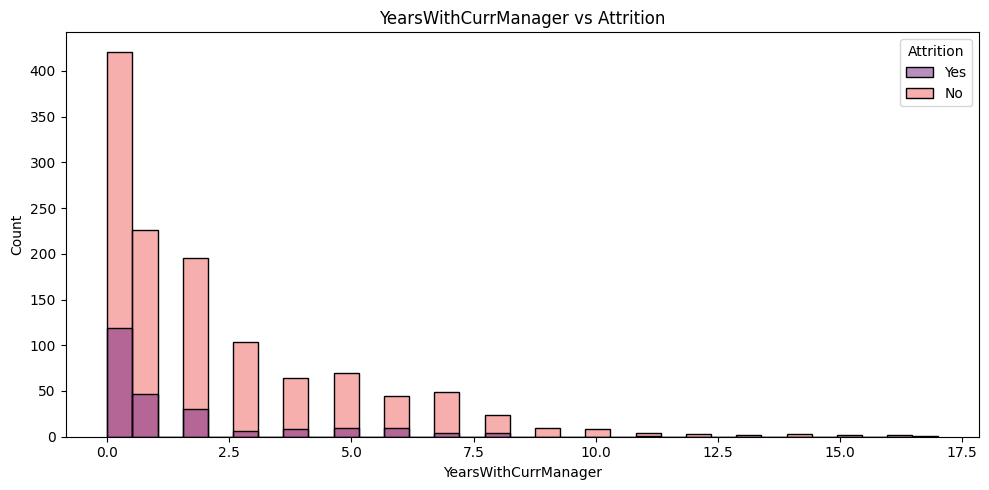

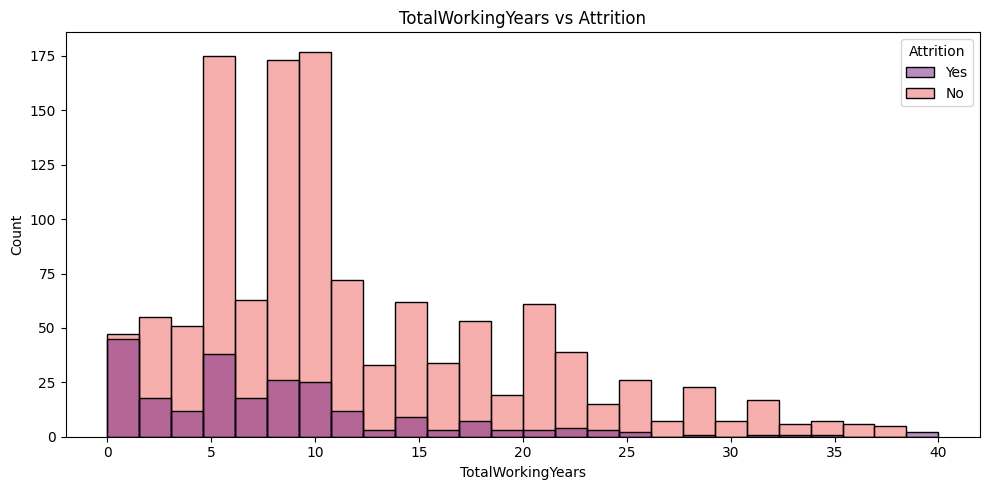

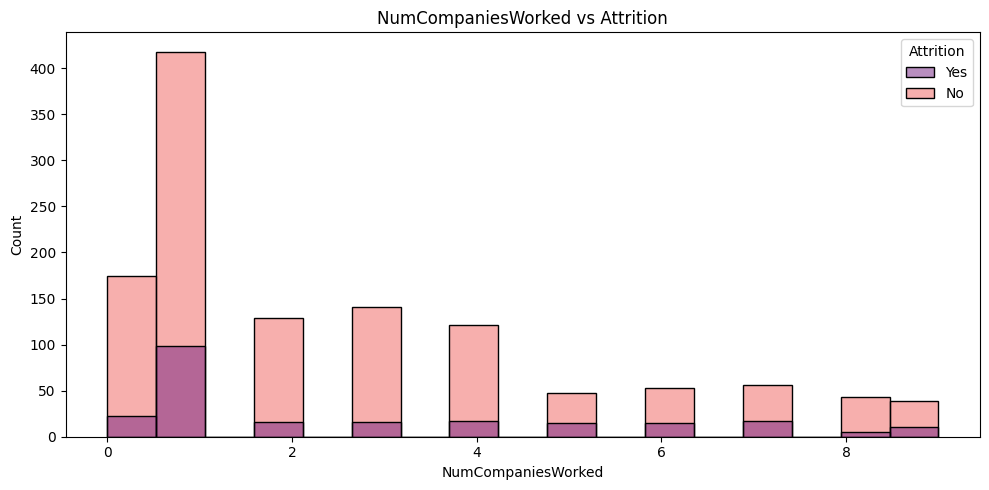

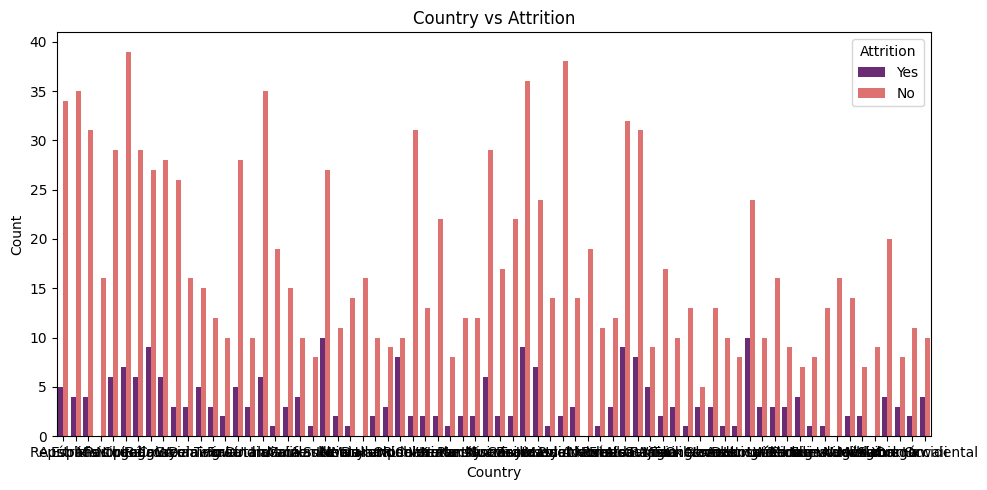

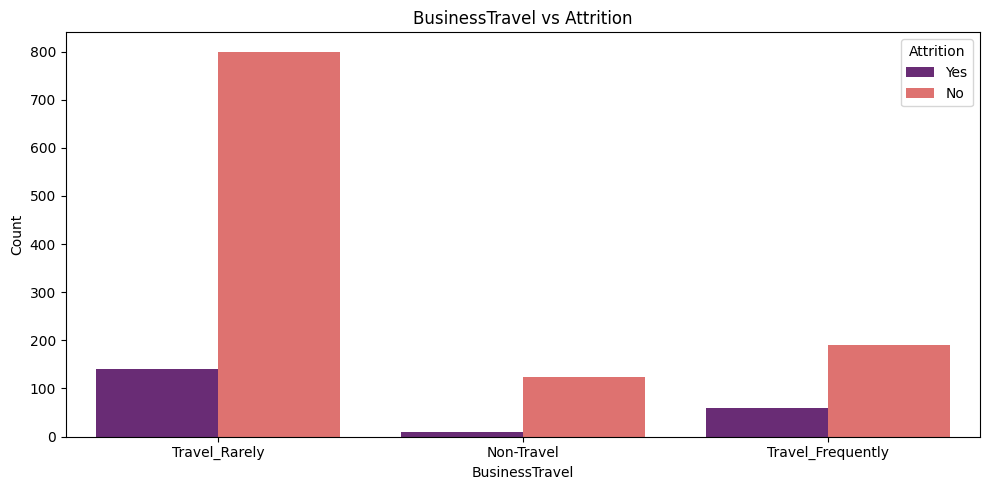

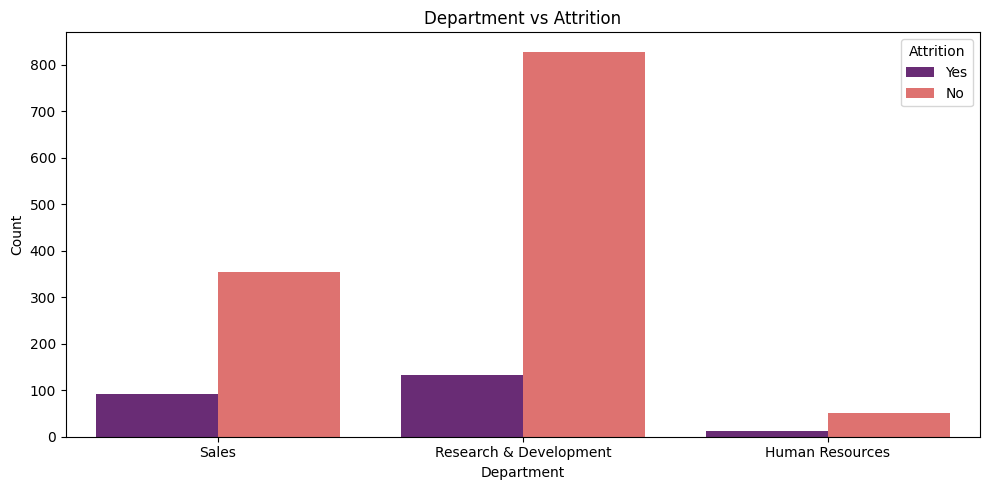

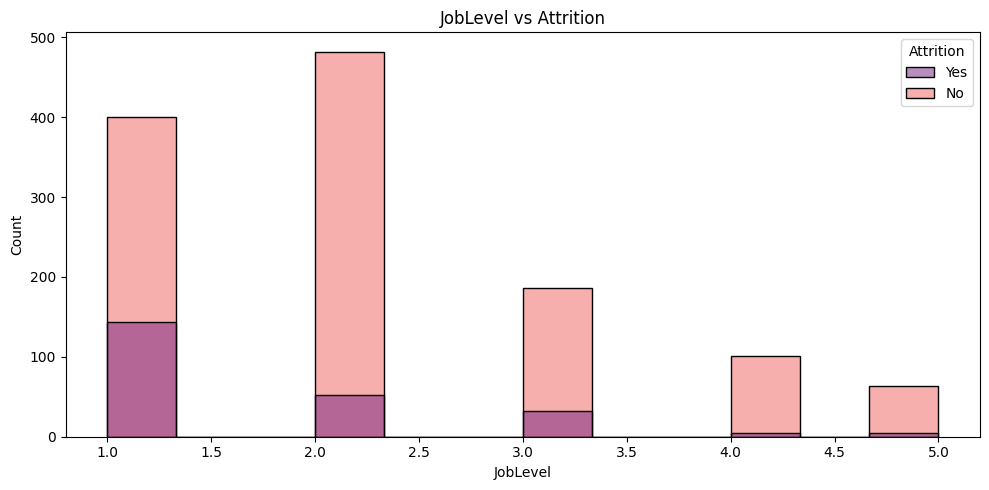

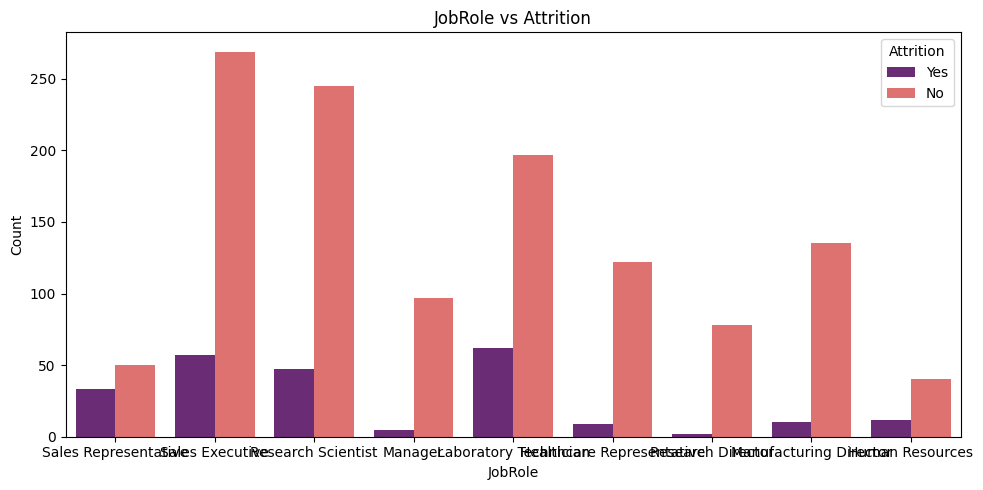

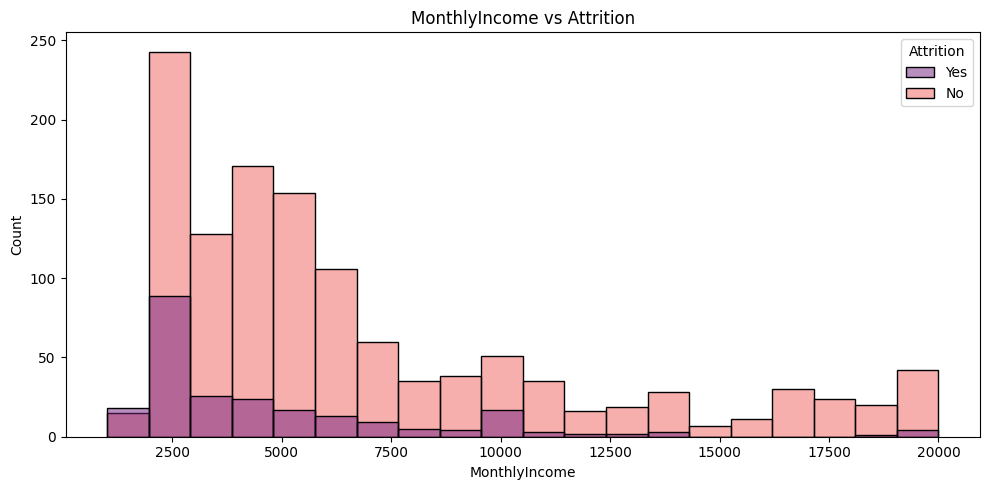

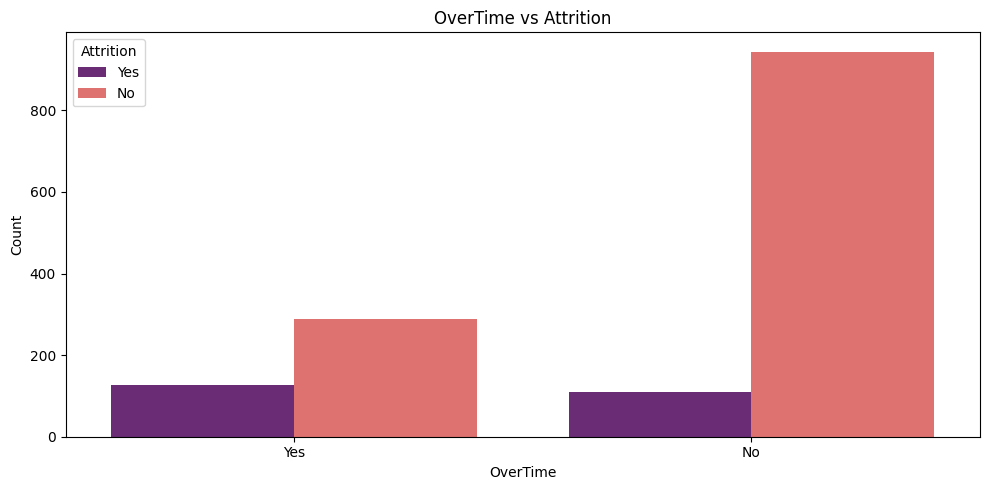

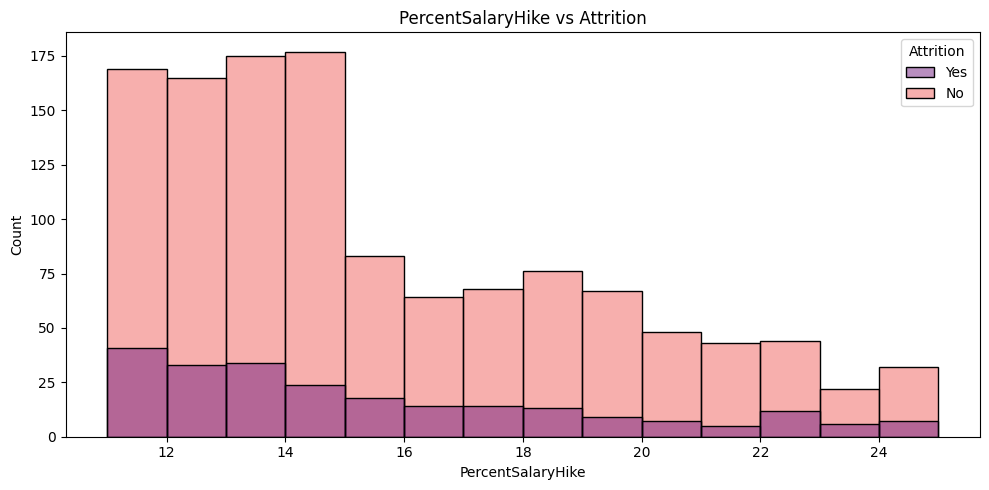

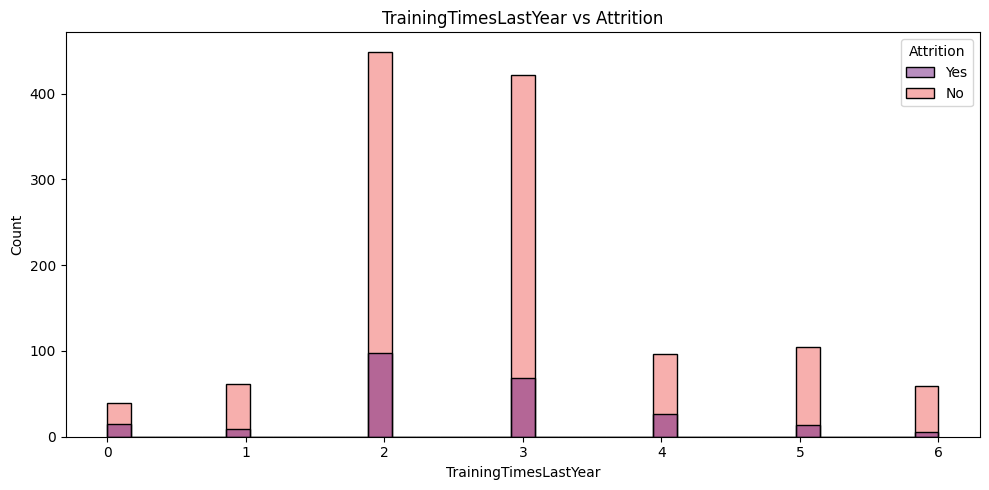

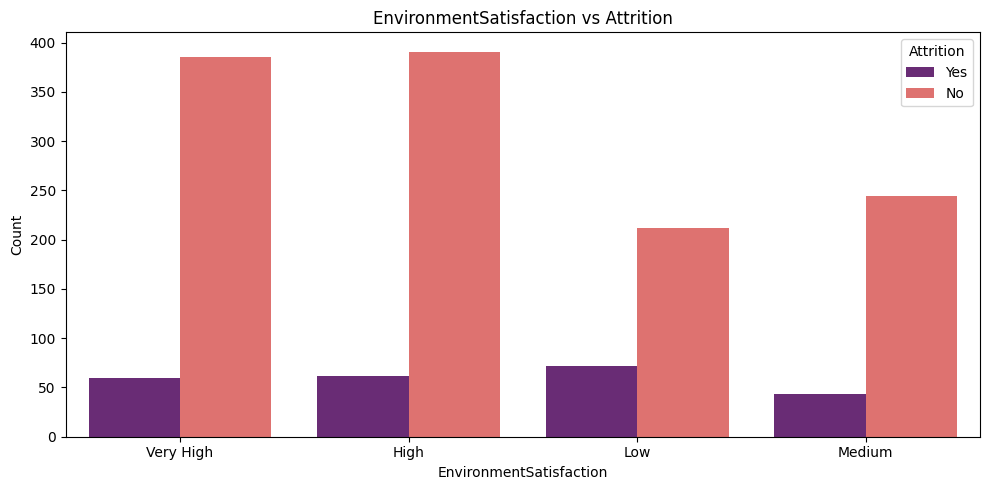

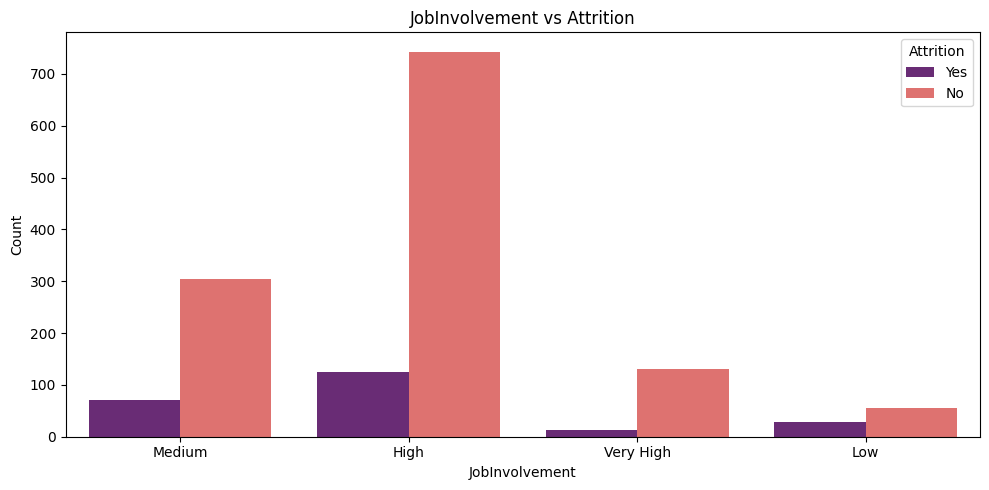

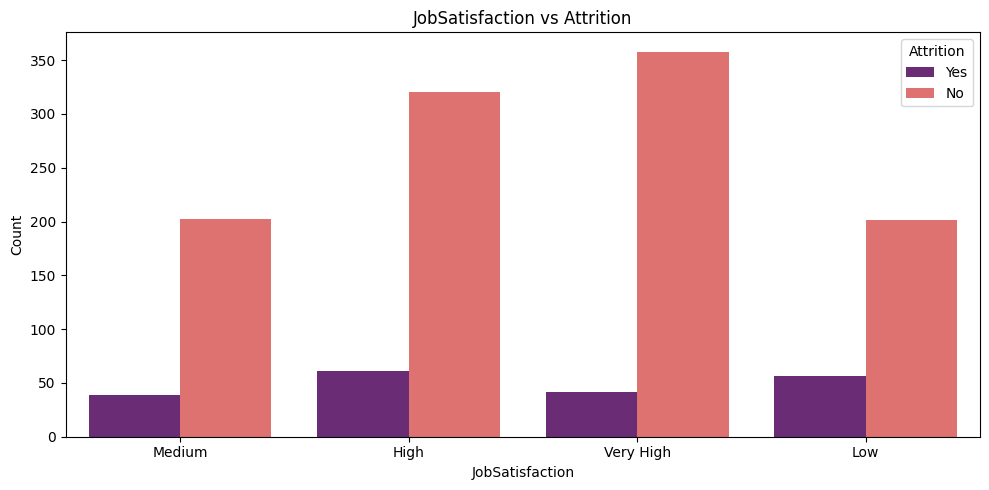

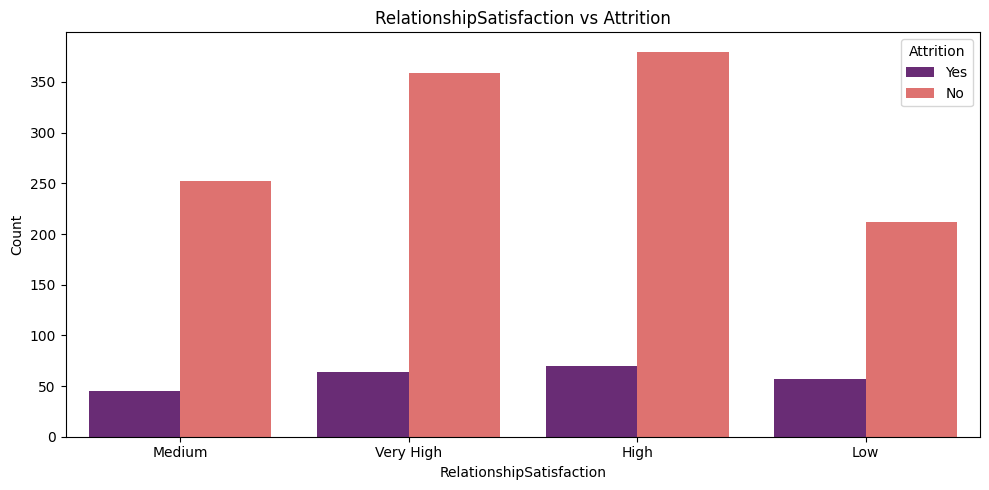

In [65]:
# Definir la variable objetivo
tv = 'Attrition'

for col in df.columns:
    # Saltar la variable objetivo
    if col == tv:
        continue

    plt.figure(figsize=(10, 5))

    if col in num_cols:
        sns.histplot(x=df[col], hue=df[tv], data=df, palette="magma", legend=True)
    elif col in cat_cols:
        sns.countplot(x=df[col], hue=df[tv], data=df, palette="magma")

    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## Análisis de incosinstencias

In [66]:
inconsistencies = []

# Regla 1: 'YearsInCurrentRole' no puede ser mayor que 'TotalWorkingYears'
mask = df['YearsInCurrentRole'] > df['TotalWorkingYears']
for i in df.index[mask]:
    inconsistencies.append((i, 'YearsInCurrentRole > TotalWorkingYears'))

# Regla 2: 'YearsSinceLastPromotion' no puede ser mayor que 'TotalWorkingYears'
mask = df['YearsSinceLastPromotion'] > df['TotalWorkingYears']
for i in df.index[mask]:
    inconsistencies.append((i, 'YearsSinceLastPromotion > TotalWorkingYears'))

# Regla 3: 'YearsWithCurrManager' no puede ser mayor que 'TotalWorkingYears'
mask = df['YearsWithCurrManager'] > df['TotalWorkingYears']
for i in df.index[mask]:
    inconsistencies.append((i, 'YearsWithCurrManager > TotalWorkingYears'))

# Regla 4: 'Age' debe ser mayor que 'TotalWorkingYears' + 17
mask = df['Age'] < df['TotalWorkingYears'] + 17
for i in df.index[mask]:
    inconsistencies.append((i, 'Age < TotalWorkingYears'))

# Crear DataFrame de inconsistencias
inconsistencies_df = pd.DataFrame(inconsistencies, columns=['Index', 'Inconsistency'])

# Obtener los índices únicos de las inconsistencias
inconsistent_indices = inconsistencies_df['Index'].unique()

# Filtrar el DataFrame original
df_inconsistent_rows = df.loc[inconsistent_indices]


In [67]:
inconsistencies_df['Inconsistency'].value_counts()

Inconsistency
YearsInCurrentRole > TotalWorkingYears    388
Name: count, dtype: int64

In [68]:
df_inconsistent_rows.head()

,Education,EducationField,Gender,MaritalStatus,Age,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Country,Attrition,BusinessTravel,Department,JobLevel,JobRole,MonthlyIncome,OverTime,PercentSalaryHike,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,RelationshipSatisfaction
0,Bachelor,Other,Male,Single,19,14,0,0,1,1.0,Austria,Yes,Travel_Rarely,Sales,1,Sales Representative,2121,Yes,13,3,Very High,Medium,Medium,Medium
1,College,Technical Degree,Female,Married,30,16,0,0,4,7.0,España,No,Non-Travel,Sales,2,Sales Executive,4736,Yes,12,2,Very High,High,High,Medium
2,College,Life Sciences,Male,Single,22,20,0,0,4,0.0,República Checa,No,Travel_Rarely,Research & Development,1,Research Scientist,3375,No,12,2,Very High,High,High,Very High
5,Bachelor,Medical,Male,Single,32,15,0,0,10,2.0,Noruega,No,Travel_Rarely,Research & Development,3,Manager,11244,No,25,5,High,High,Very High,Medium
9,Master,Life Sciences,Male,Married,41,23,1,1,7,2.0,Grecia,No,Travel_Rarely,Research & Development,1,Laboratory Technician,2238,No,21,2,High,High,Low,Very High


In [69]:
df.drop(columns=['YearsInCurrentRole'], inplace=True)

Guardamos el dataframe de nuevo

In [70]:
df.to_csv('HR_Employee_Attrition_EDA.csv')